<a href="https://colab.research.google.com/github/choudhurysibani120/credit-card-default-prediction/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [1]:

# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC
% matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/Copy of default of credit card clients.xls',header=1)

In [4]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [6]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [7]:
data.shape

(30000, 25)

In [8]:
data = data.drop(["ID"],axis=1)

In [32]:
#changing the name of  pay_0 column to pay_1 to make the numbering correct
data.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [33]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_AMT,PAY_AMT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704,689
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077,5000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653,11018
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334,8388
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339,59049


In [9]:
data['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

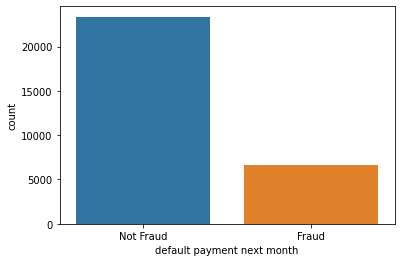

In [10]:
g = sns.countplot(data['default payment next month'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

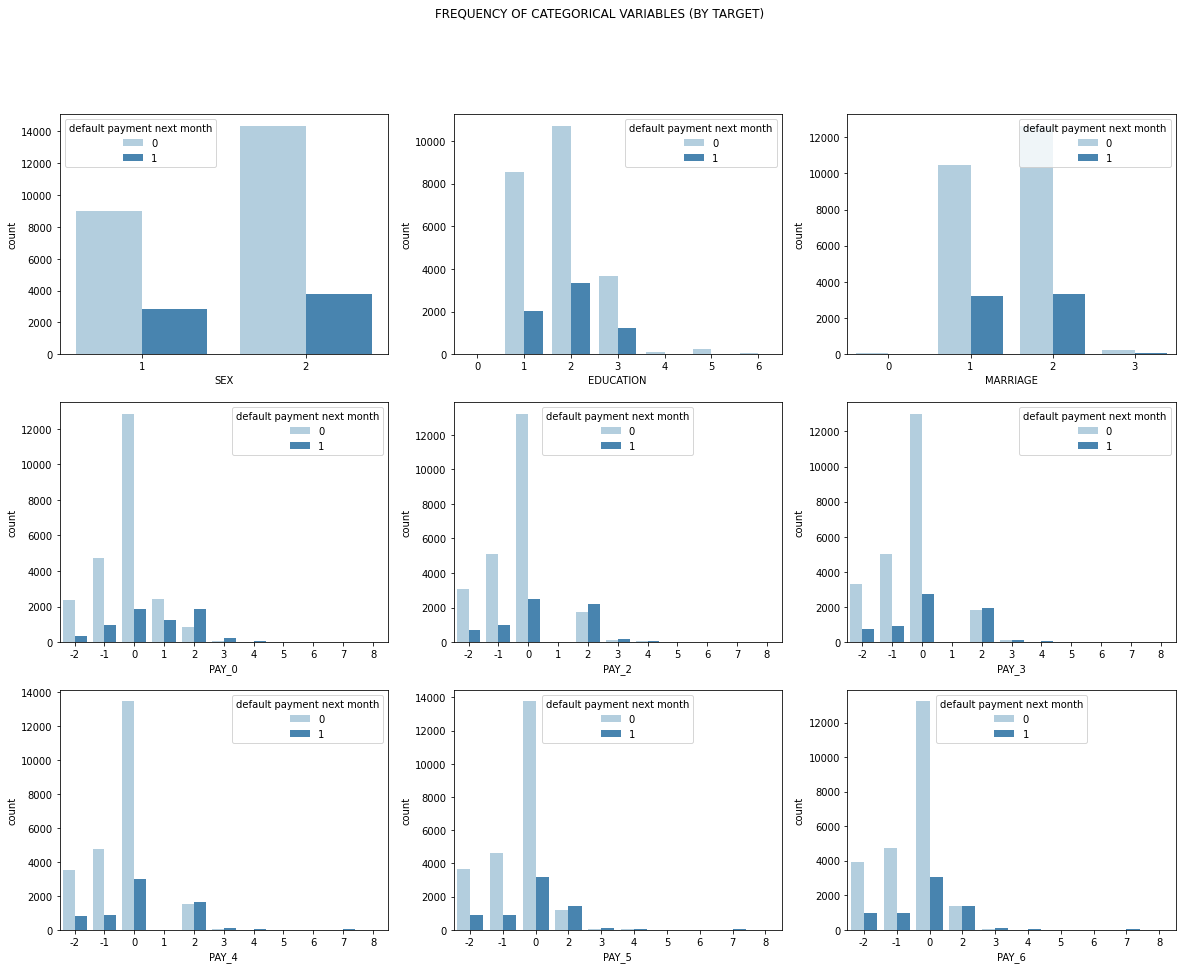

In [11]:

subset = data[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default payment next month']]

f, axes = plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax1 = sns.countplot(x="SEX", hue="default payment next month", data=subset, palette="Blues", ax=axes[0,0])
ax2 = sns.countplot(x="EDUCATION", hue="default payment next month", data=subset, palette="Blues",ax=axes[0,1])
ax3 = sns.countplot(x="MARRIAGE", hue="default payment next month", data=subset, palette="Blues",ax=axes[0,2])
ax4 = sns.countplot(x="PAY_0", hue="default payment next month", data=subset, palette="Blues", ax=axes[1,0])
ax5 = sns.countplot(x="PAY_2", hue="default payment next month", data=subset, palette="Blues", ax=axes[1,1])
ax6 = sns.countplot(x="PAY_3", hue="default payment next month", data=subset, palette="Blues", ax=axes[1,2])
ax7 = sns.countplot(x="PAY_4", hue="default payment next month", data=subset, palette="Blues", ax=axes[2,0])
ax8 = sns.countplot(x="PAY_5", hue="default payment next month", data=subset, palette="Blues", ax=axes[2,1])
ax9 = sns.countplot(x="PAY_6", hue="default payment next month", data=subset, palette="Blues", ax=axes[2,2]);

In [12]:
data['AGE']=data['AGE'].astype('int')

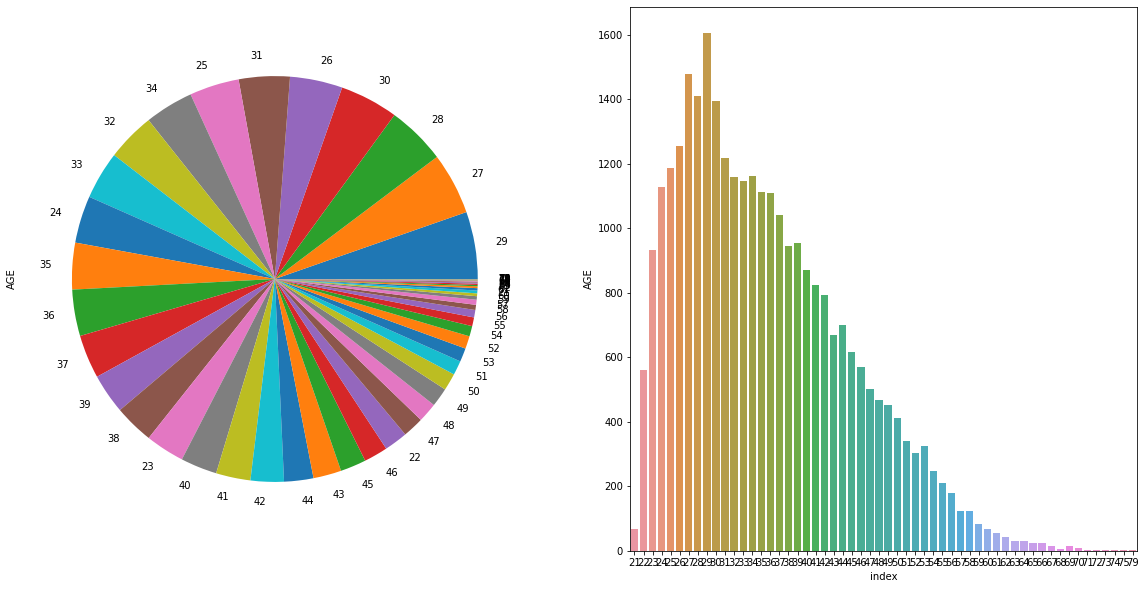

In [13]:
fig, axes = plt.subplots(ncols=2,figsize=(20,10))
Day_data=data['AGE'].value_counts().reset_index()
data['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='AGE',data=Day_data,ax = axes[1],orient='v')

In [14]:
data['BILL_AMT']=data['BILL_AMT1']+data['BILL_AMT2']+data['BILL_AMT3']+data['BILL_AMT4']+data['BILL_AMT5']+data['BILL_AMT6']
data['PAY_AMT']=data['PAY_AMT1']+data['PAY_AMT2']+data['PAY_AMT3']+data['PAY_AMT4']+data['PAY_AMT5']+data['PAY_AMT6']

In [ ]:
df_fr.groupby('IsDefaulter')['Payement_Value'].mean()

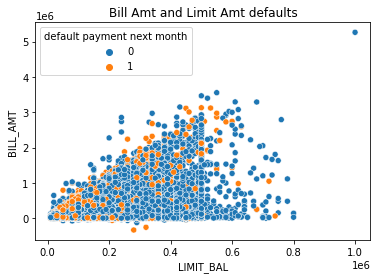

In [17]:

sns.scatterplot(x='LIMIT_BAL',y='BILL_AMT',hue='default payment next month', data=data)
plt.title("Bill Amt and Limit Amt defaults")
plt.show()

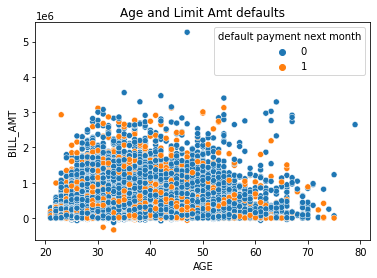

In [18]:
sns.scatterplot(x='AGE',y='BILL_AMT',hue='default payment next month', data=data)
plt.title("Age and Limit Amt defaults")
plt.show()

In [26]:
#Removing Unwanted categorical levels as mentioned in data exploration
data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [28]:
data["EDUCATION"]=data["EDUCATION"].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})
data["MARRIAGE"]=data["MARRIAGE"].map({0:3,1:1,2:2,3:3})

In [29]:
def cat_plot(x):
  plt.figure(figsize=(16,8))
  sns.countplot(data[x])
  plt.show()
  print(data[x].value_counts(normalisesTrue))

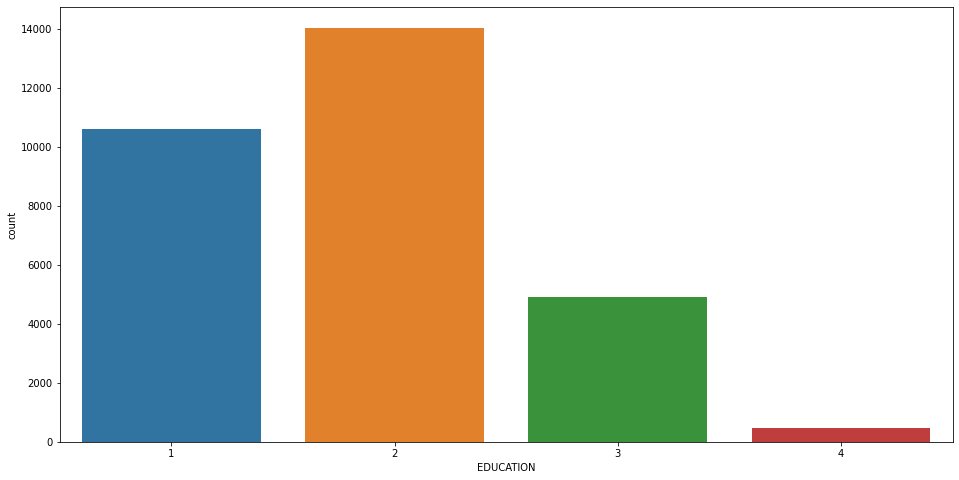

NameError: ignored

In [30]:
cat_plot('EDUCATION')

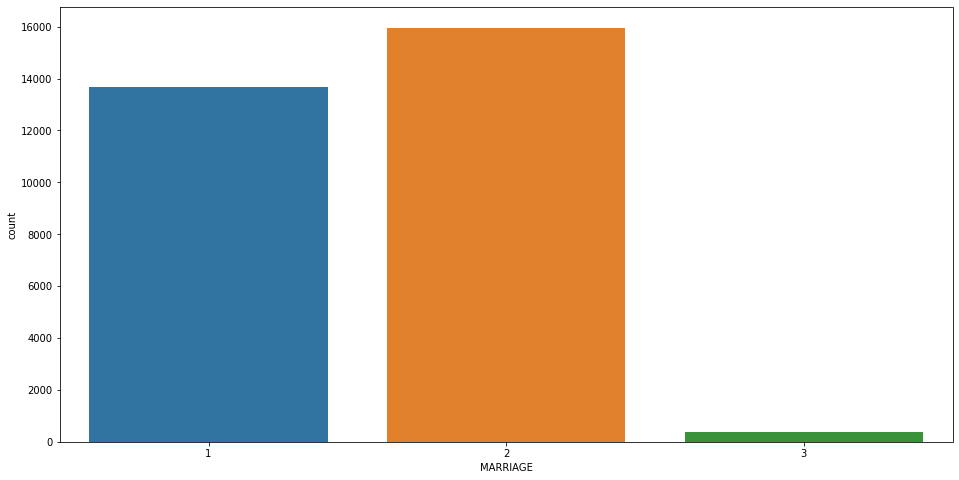

NameError: ignored

In [31]:
cat_plot('MARRIAGE')

In [21]:
num_data = data.select_dtypes(include= np.number)

In [22]:
num_data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'BILL_AMT', 'PAY_AMT'],
      dtype='object')

In [23]:
import random

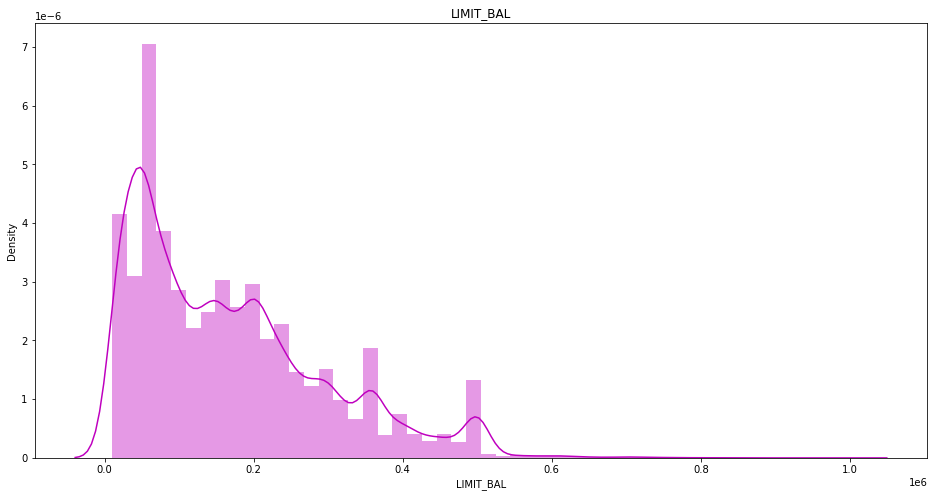

min: 10000
max: 1000000
mean: 167484.32266666667


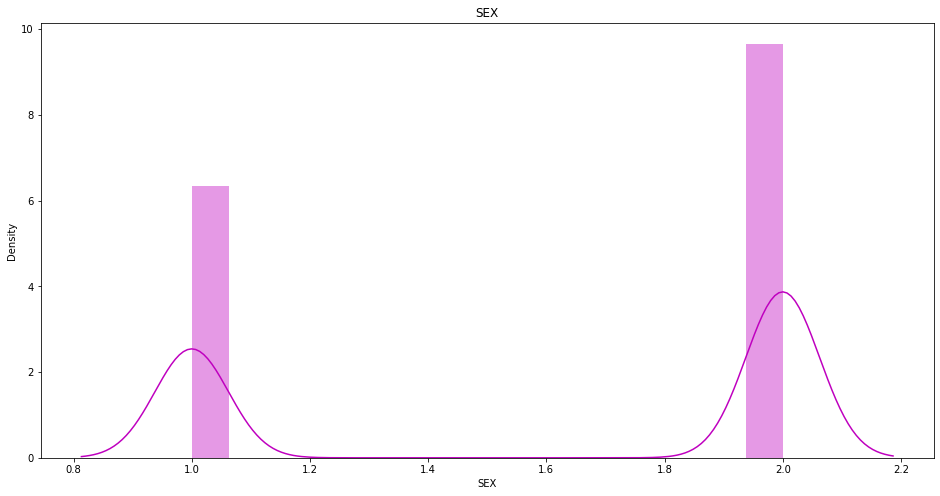

min: 1
max: 2
mean: 1.6037333333333332


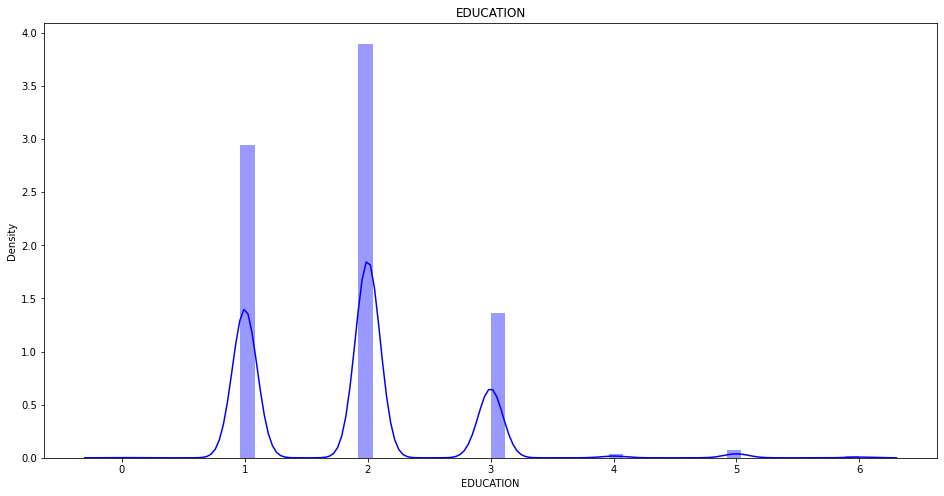

min: 0
max: 6
mean: 1.8531333333333333


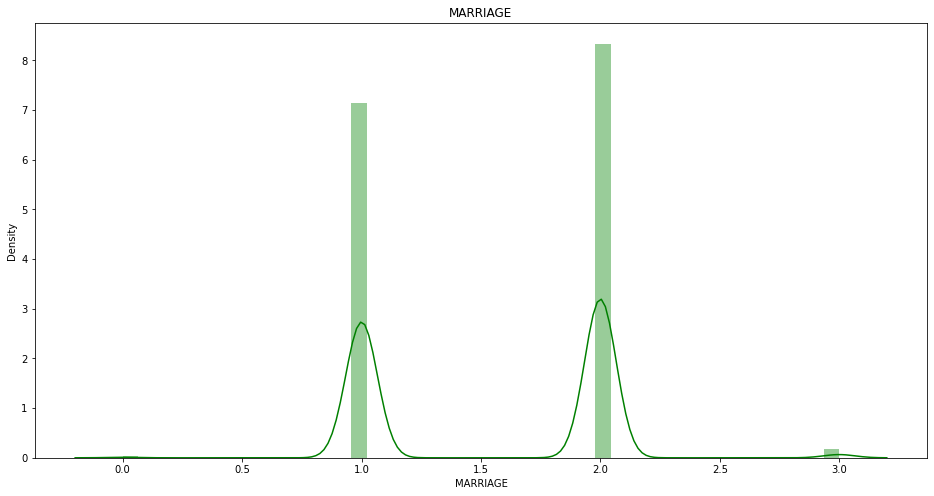

min: 0
max: 3
mean: 1.5518666666666667


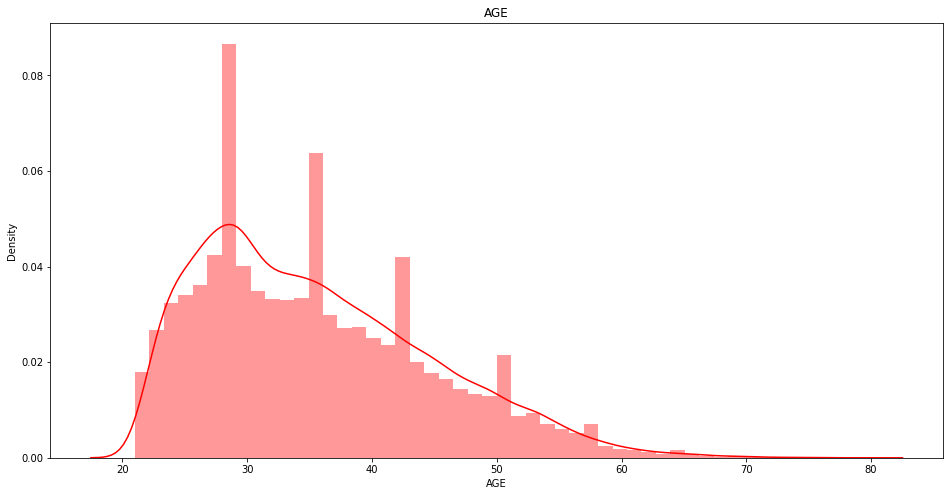

min: 21
max: 79
mean: 35.4855


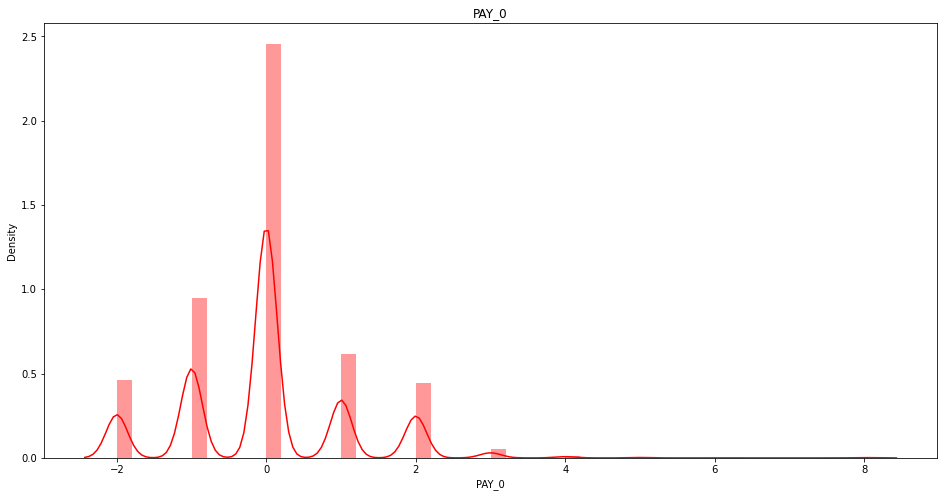

min: -2
max: 8
mean: -0.0167


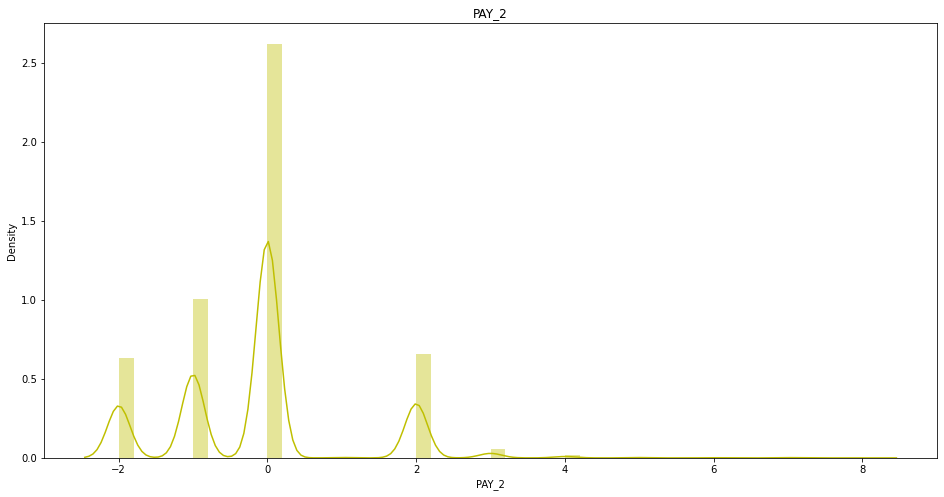

min: -2
max: 8
mean: -0.13376666666666667


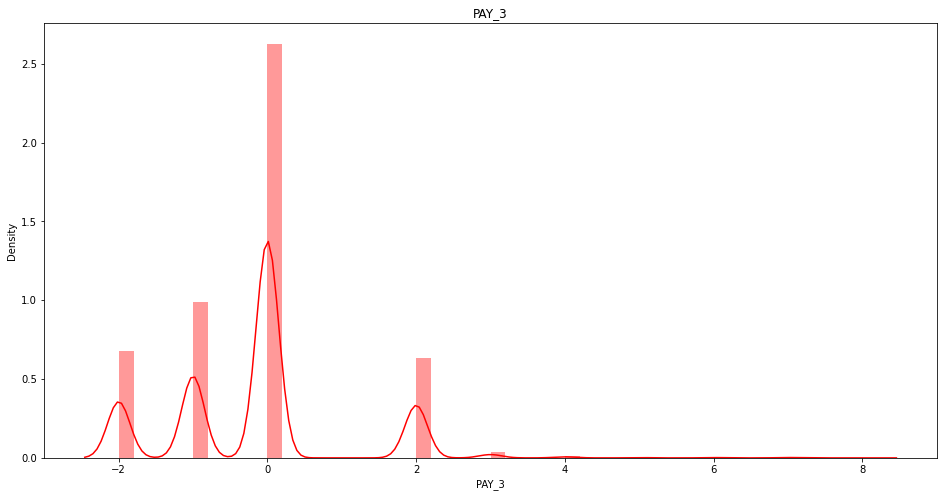

min: -2
max: 8
mean: -0.1662


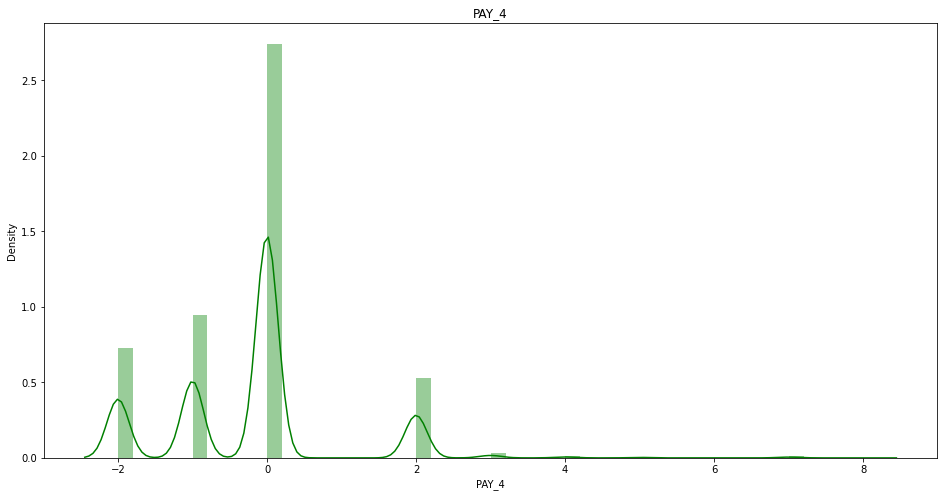

min: -2
max: 8
mean: -0.22066666666666668


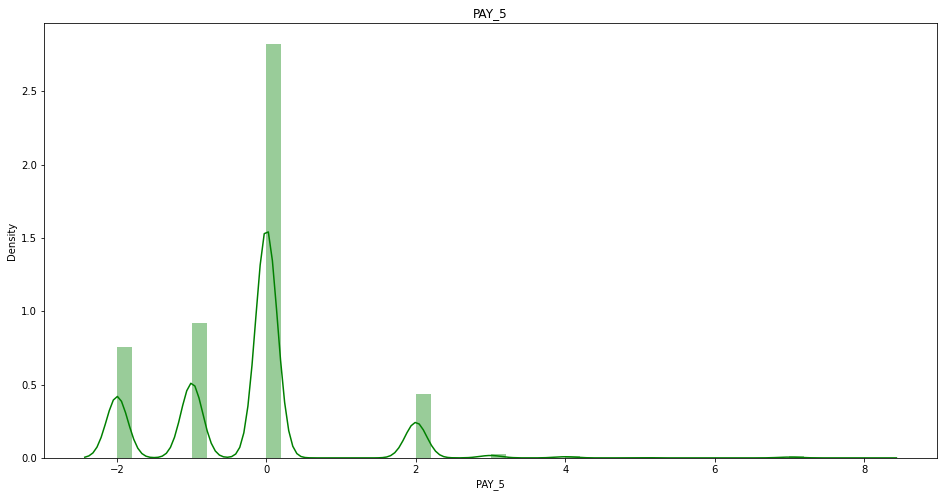

min: -2
max: 8
mean: -0.2662


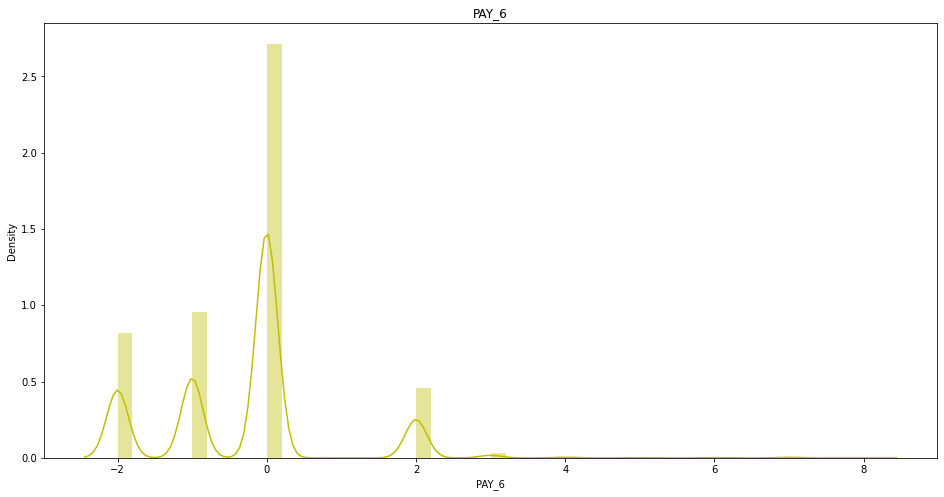

min: -2
max: 8
mean: -0.2911


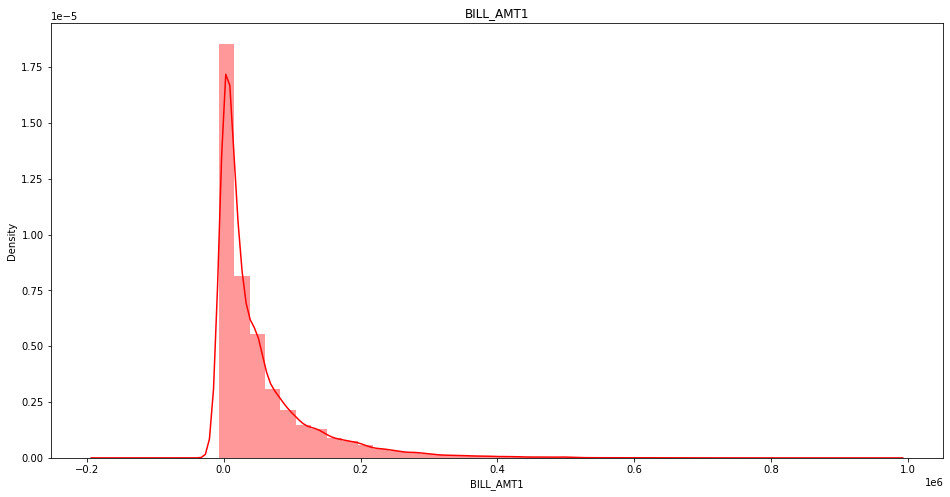

min: -165580
max: 964511
mean: 51223.3309


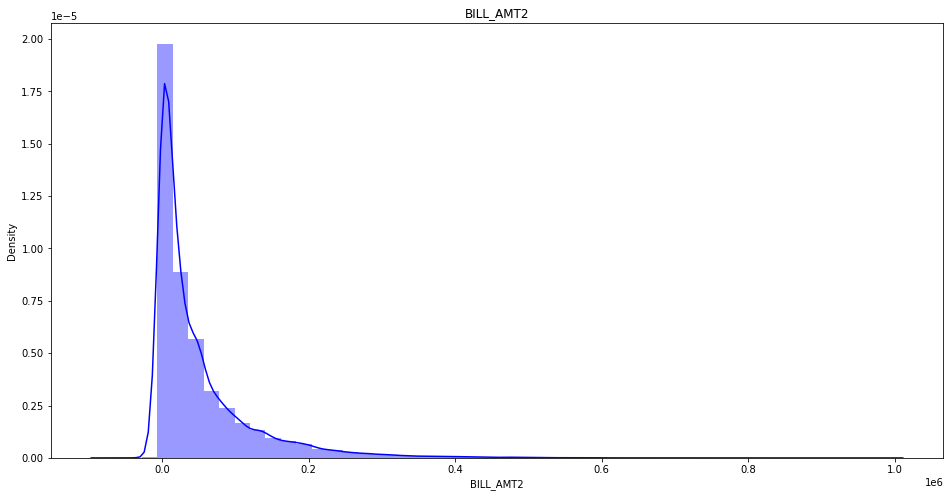

min: -69777
max: 983931
mean: 49179.07516666667


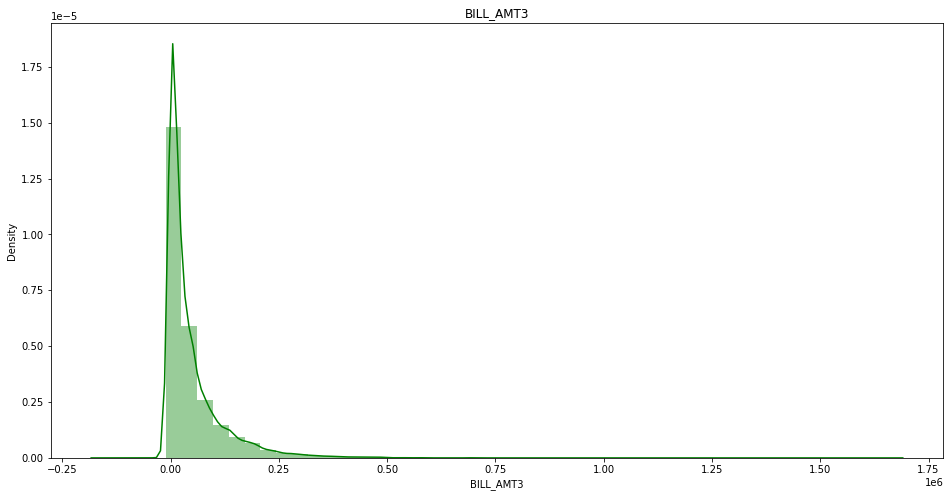

min: -157264
max: 1664089
mean: 47013.1548


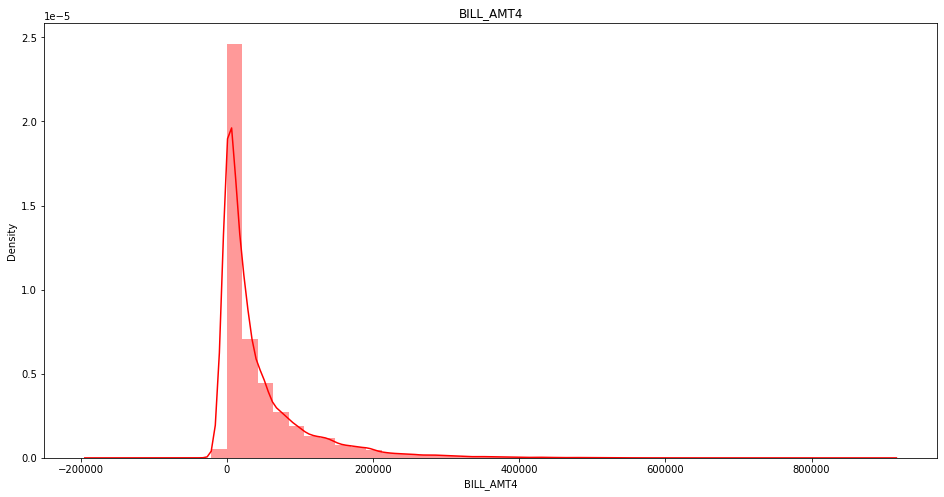

min: -170000
max: 891586
mean: 43262.94896666666


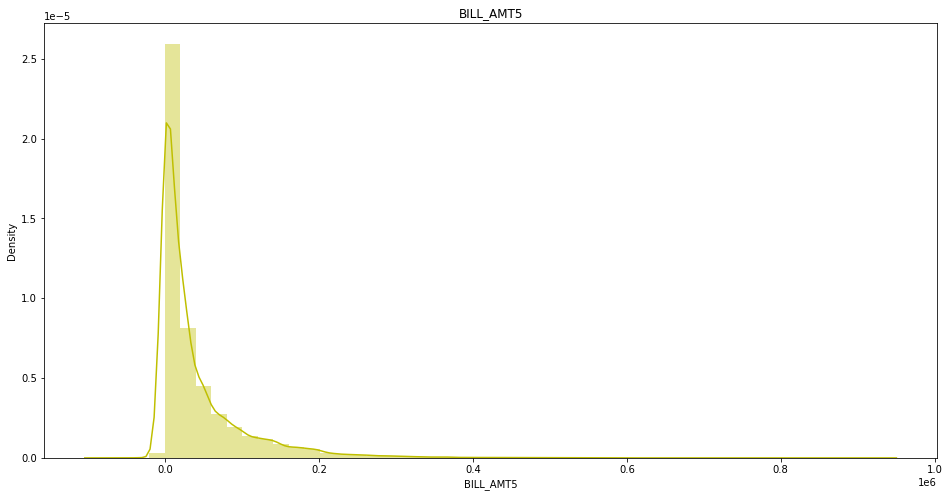

min: -81334
max: 927171
mean: 40311.40096666667


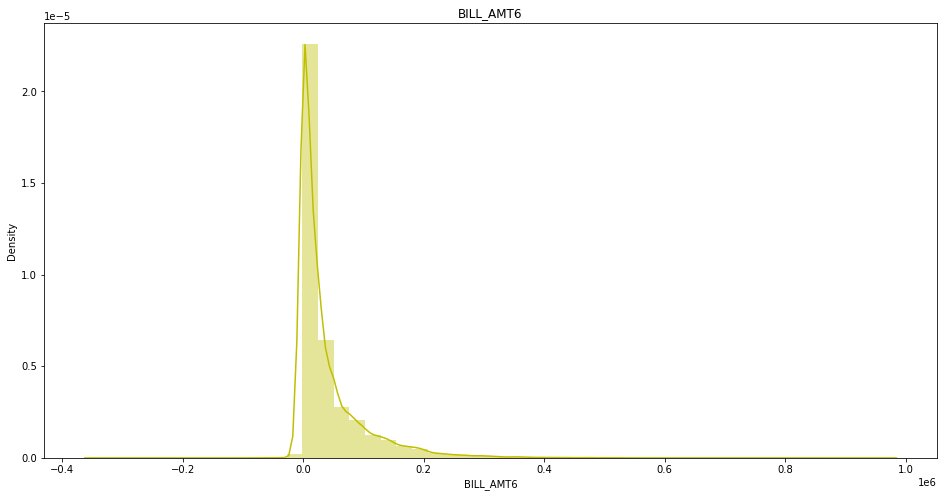

min: -339603
max: 961664
mean: 38871.7604


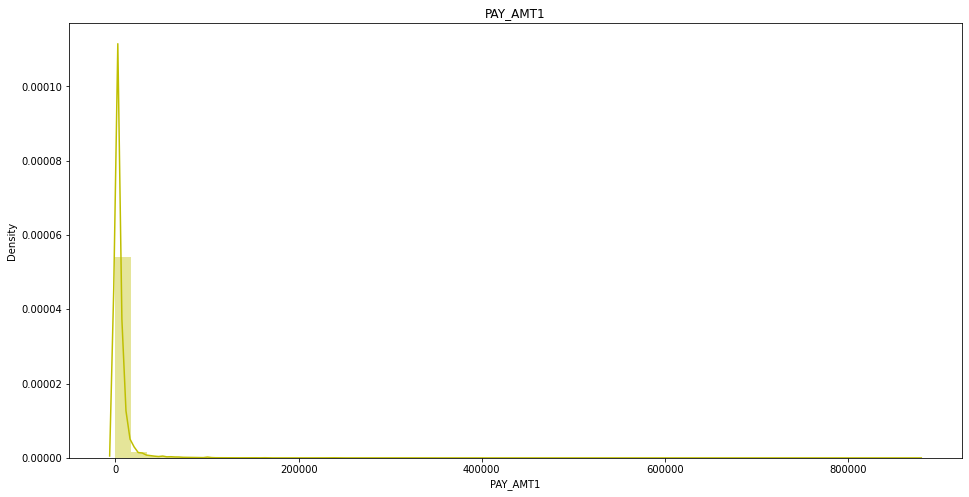

min: 0
max: 873552
mean: 5663.5805


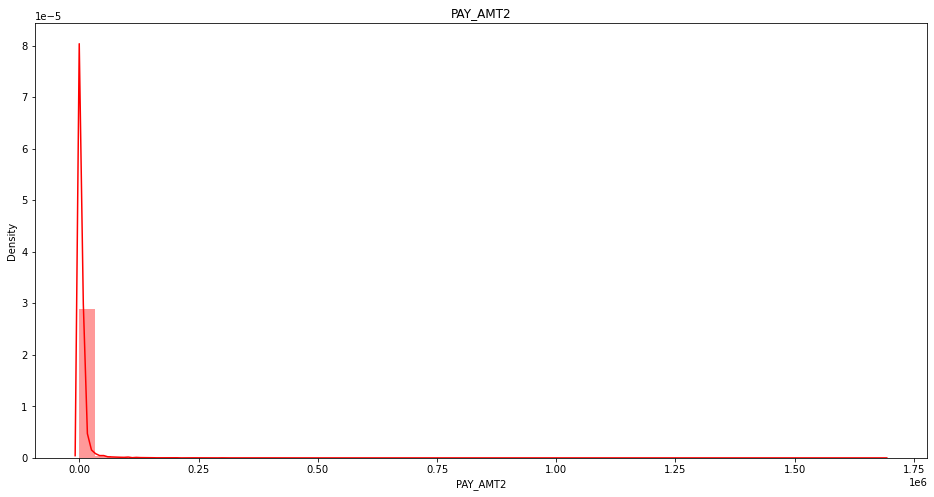

min: 0
max: 1684259
mean: 5921.1635


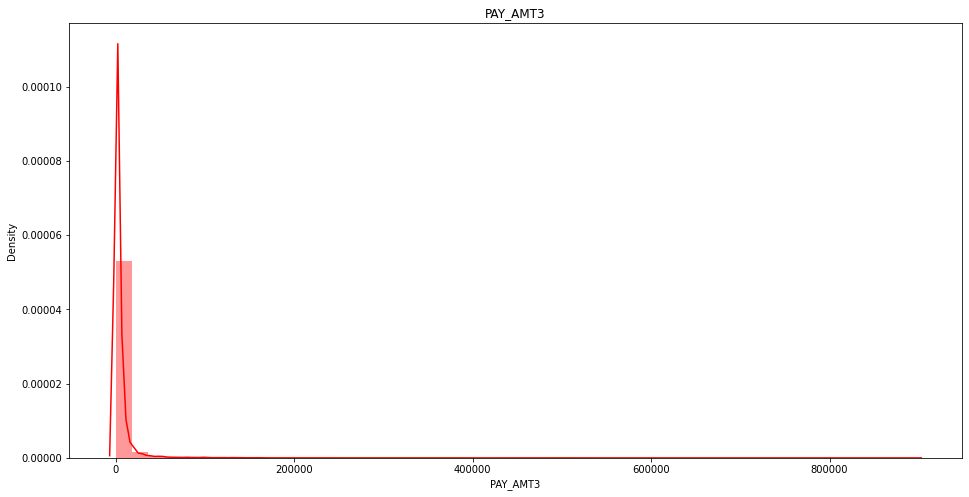

min: 0
max: 896040
mean: 5225.6815


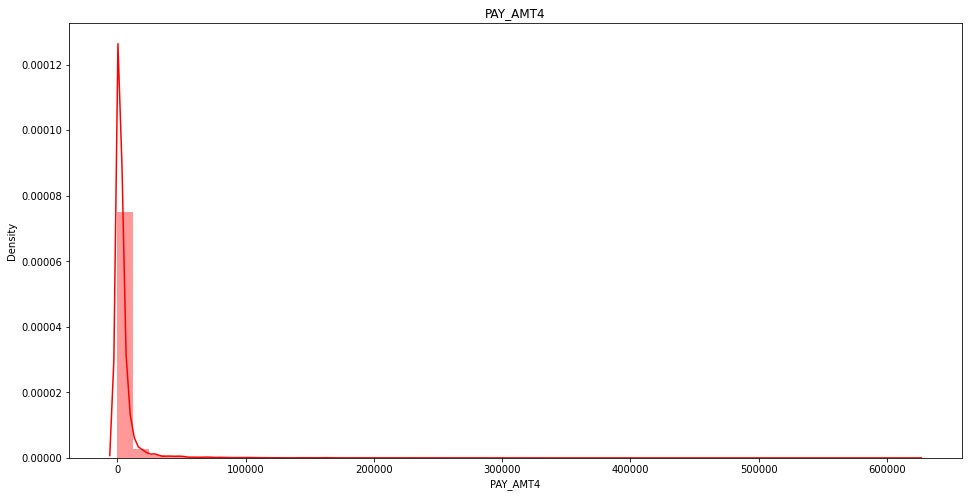

min: 0
max: 621000
mean: 4826.076866666666


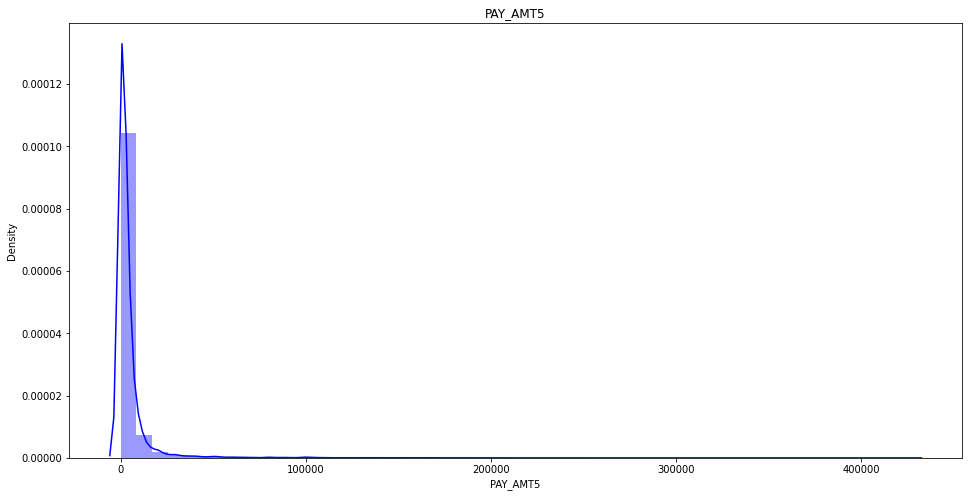

min: 0
max: 426529
mean: 4799.387633333334


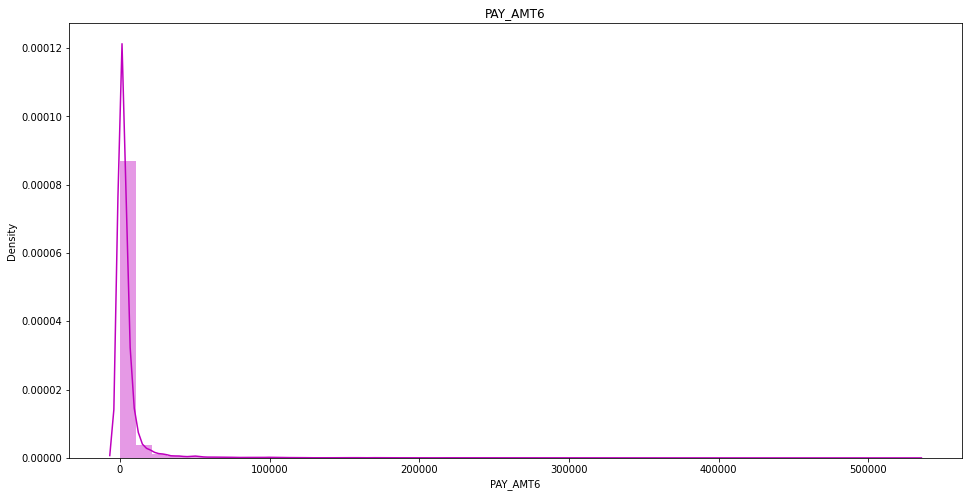

min: 0
max: 528666
mean: 5215.502566666667


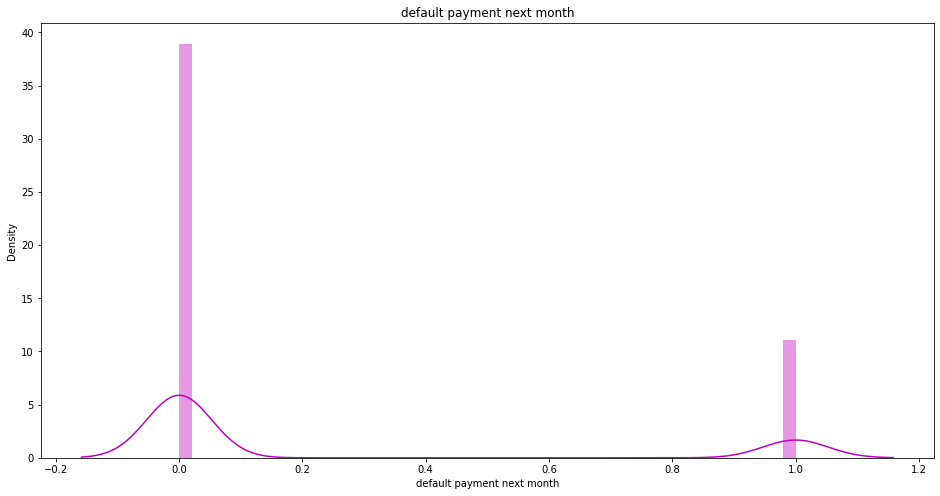

min: 0
max: 1
mean: 0.2212


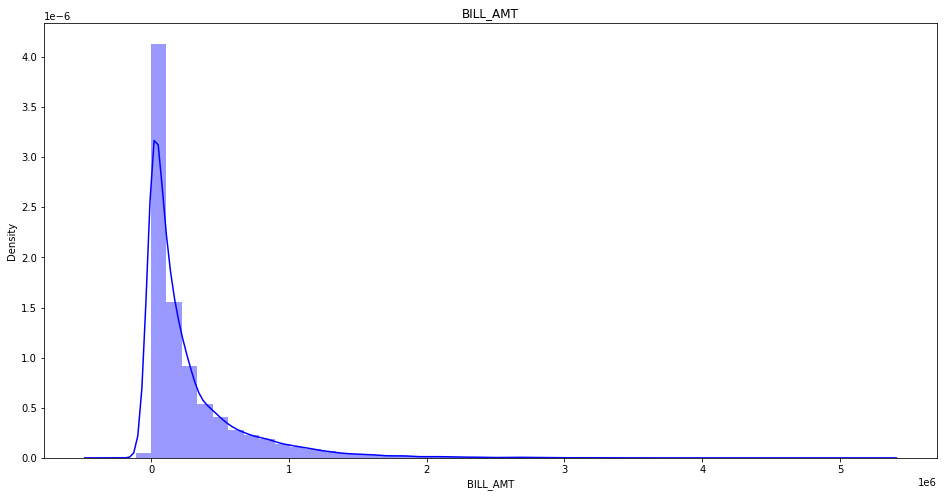

min: -336259
max: 5263883
mean: 269861.6712


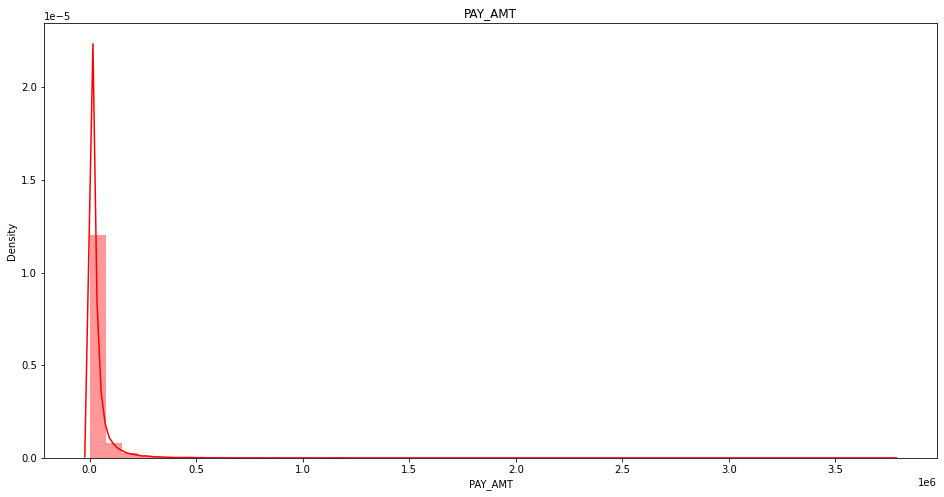

min: 0
max: 3764066
mean: 31651.392566666666


In [24]:
for col in num_data.columns:
  plt.figure(figsize=(16,8))
  c = random.choice(['g','r','b','y','m'])
  sns.distplot(num_data[col],color=c)
  plt.title(col)
  plt.show()

  print('min:',num_data[col].min())
  print('max:',num_data[col].max())
  print('mean:',num_data[col].mean())

In [34]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
X=data.drop(['default payment next month'],axis=1)
X=scaling.fit_transform(X)

In [35]:
y=data['default payment next month']

In [36]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [37]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [38]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [39]:
classifier=xgboost.XGBClassifier()

In [40]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [41]:

from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X,y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.8min finished



 Time taken: 0 hours 1 minutes and 51.73 seconds.


In [42]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=5, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [43]:
random_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.4,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 5}

In [44]:

classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4, gamma=0.1, learning_rate=0.25,
       max_delta_step=0, max_depth=3, min_child_weight=7, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [45]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X,y,cv=10)

In [46]:
score

array([0.80633333, 0.80933333, 0.81333333, 0.807     , 0.81833333,
       0.82666667, 0.83666667, 0.83166667, 0.829     , 0.82466667])

In [47]:
score.mean()

0.8202999999999999